In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_folder = '../../data/text_responses/'

In [3]:
df = pd.read_csv(f'{root_folder}/playfight/with_cover_story/data_all_subs_forQC_anonymised.csv',index_col=[0])
df.head()

,index,sub_ind,PID,date,stimset_rows,total_trials,nplanned_trialIDs,npresented_trialIDs,planned_trialIDs_all,presented_trialIDs_all,chargeSpeeds,chargeSpeeds_sorted,agent1Colors,responses,agents_type,strategy,feedback
0,0,24000,659ecf23553b45a0326cb6b2,4,22,50,7,7,"['81e3fe3f-5a7c-42d3-8ea7-c2bf3831288b', '59df...","['59df47e5-696a-407f-aa33-94dab9b3e492', '86e2...","[2.75, 4.0, 7.75, 6.5, 9.0, 5.25, 1.5]","[1.5, 2.75, 4.0, 5.25, 6.5, 7.75, 9.0]","['grey', 'black', 'grey', 'black', 'black', 'g...","['fighting', 'collision (fighting)', 'collisio...",children,I try to observe if there was a collision and ...,None
1,2,24002,5c4fe78f8ac59200014cf239,4,20,38,7,6,"['e4bc0778-6eb7-4065-bf77-a9b6e293735f', 'c49b...","['6e2932f2-a9d1-4f2a-9599-a872b605c1eb', 'ed38...","[9.0, 6.5, 5.25, 7.75, 4.0, 2.75]","[2.75, 4.0, 5.25, 6.5, 7.75, 9.0]","['grey', 'black', 'grey', 'grey', 'black', 'gr...",['The dots are running into each other and col...,,,
2,15,24015,657f030038e31904b66cc81e,4,9,43,7,7,"['7e595f18-f375-4ca5-b922-61b8d693804d', '88ff...","['8ecf5da9-a68c-4392-8c1a-ecb9754dd9d9', '1d41...","[7.75, 4.0, 5.25, 9.0, 1.5, 2.75, 6.5]","[1.5, 2.75, 4.0, 5.25, 6.5, 7.75, 9.0]","['grey', 'black', 'grey', 'black', 'black', 'g...",['they were bumping into each other and reboun...,children,"purely observation, the speed of the collision...",no
3,16,24016,610826a7604223dea33406f1,4,13,43,7,7,"['1a8cf3c1-690b-449c-bb36-fd3b251837c1', '0bad...","['6a57f963-5846-4eaa-a5d2-0e658499a4a9', '27f4...","[9.0, 5.25, 2.75, 4.0, 1.5, 6.5, 7.75]","[1.5, 2.75, 4.0, 5.25, 6.5, 7.75, 9.0]","['grey', 'grey', 'black', 'black', 'grey', 'bl...","['Fighting', 'Rough', 'Playing', 'catching up'...",children,Paying attention to the speed of the dots.,NaN
4,18,24018,654a4e70d54c53b51f1dde61,4,8,43,7,7,"['9d425f58-501f-43f3-955e-05126bd09bb5', 'cc65...","['6e2932f2-a9d1-4f2a-9599-a872b605c1eb', '9d42...","[9.0, 1.5, 4.0, 2.75, 7.75, 5.25, 6.5]","[1.5, 2.75, 4.0, 5.25, 6.5, 7.75, 9.0]","['grey', 'grey', 'grey', 'black', 'black', 'bl...","['running away and coming together', 'smooth f...",children,no,no


In [4]:
df.shape

(102, 17)

In [5]:
df.groupby(['agents_type']).count().iloc[:,0]

agents_type
             8
children    93
magnets      1
Name: index, dtype: int64

In [6]:
df.loc[df['agents_type']== 'something else (describe on the next page)',['sub_ind','strategy','feedback']].values

array([], shape=(0, 3), dtype=object)

In [7]:
df.shape

(102, 17)

In [8]:
df = df[df['agents_type'] != ' ']
df.shape

(94, 17)

In [48]:
df.loc[df['agents_type']=='magnets',['strategy','feedback']]

,strategy,feedback
84,yes,no


In [32]:
df_count = df.groupby(['agents_type']).count().iloc[:,0].reset_index()
if 'index' in df_count.columns:
    df_count.rename(columns = {'index':'count'},inplace=True)

df_count.sort_values(by=['count'],inplace=True,ascending=False)
df_count['count_pc'] = 100*df_count['count']/df_count['count'].sum()
df_count

,agents_type,count,count_pc
0,children,93,98.93617
1,magnets,1,1.06383


In [33]:
df_count = df_count.append({'agents_type':'adults','count':0,'count_pc':0},ignore_index=True)
df_count = df_count.append({'agents_type':'balls','count':0,'count_pc':0},ignore_index=True)
df_count = df_count.append({'agents_type':'animals','count':0,'count_pc':0},ignore_index=True)
df_count

,agents_type,count,count_pc
0,children,93,98.93617
1,magnets,1,1.06383
2,adults,0,0.00000
3,balls,0,0.00000
4,animals,0,0.00000


In [34]:
results_loc = '../../results/text_analysis/pf/with_cover_story'

In [35]:
s=14 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

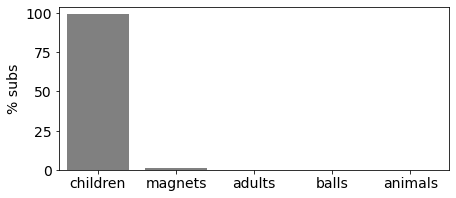

In [36]:
plt.figure(figsize=(7,3))
sns.barplot(data=df_count,x='agents_type',y='count_pc',color = 'grey')
plt.ylabel('% subs')
plt.xlabel('')
plt.savefig(f'{results_loc}/agents_type_bar.png')

In [45]:
df_count['agent_type_withpc'] = [f"{row['agents_type']}\n({row['count_pc']:.1f}%)" for _,row in df_count.iterrows()]
df_count.loc[df_count['agents_type'].isin(['adults','balls','animals']),'agent_type_withpc'] = ''

In [46]:
df_count.sort_values(by=['agents_type'],inplace=True,ascending=False)

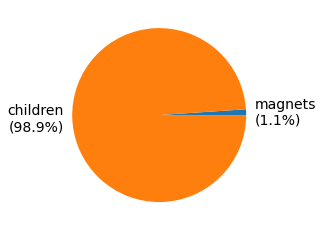

In [47]:
plt.pie(df_count['count_pc'],labels=df_count['agent_type_withpc'])
plt.savefig(f'{results_loc}/agents_type_pie.png',bbox_inches='tight')